In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

In [3]:
train_file_path = '/content/drive/MyDrive/ITU_Competition_Intrusion_and_Vulnerability_Detection_in_Software_Defined_Networks(SDN)/train_data.csv'
test_file_path = '/content/drive/MyDrive/ITU_Competition_Intrusion_and_Vulnerability_Detection_in_Software_Defined_Networks(SDN)/test_data.csv'

train_df = pd.read_csv(train_file_path,skipinitialspace=True)
test_df = pd.read_csv(test_file_path,skipinitialspace=True)

In [59]:
#Split data into X(input features) and Y (labels)
X_train = train_df.drop(train_df.columns[-15:], axis=1)
y_train = train_df[train_df.columns[-15:]]

X_test = test_df.drop(test_df.columns[-15:], axis=1)
y_test = test_df[test_df.columns[-15:]]

class_labels = y_train.columns.tolist()
labels = []
for label in class_labels:
    new_label = label.replace("Label_","")
    new_label = new_label.replace("�","")
    new_label = new_label.replace(" ","")
    labels.append(new_label)


In [60]:
print(labels)

['BENIGN', 'Bot', 'DDoS', 'DoSGoldenEye', 'DoSHulk', 'DoSSlowhttptest', 'DoSslowloris', 'FTP-Patator', 'Heartbleed', 'Infiltration', 'PortScan', 'SSH-Patator', 'WebAttackBruteForce', 'WebAttackSqlInjection', 'WebAttackXSS']


In [5]:
print("Records deleted in training dataset:",train_df.isnull().sum().sum())
print("Records deleted in test dataset:", test_df.isnull().sum().sum())

Records deleted in training dataset: 0
Records deleted in test dataset: 0


# Performance evaluation method

In [62]:
def perf_evaluation(y_true,y_pred,class_labels):
    # Convert one-hot encoded labels to integer labels
    y_true= np.asarray(y_true)
    true_labels_int = np.argmax(y_true, axis=1)
    predicted_labels_int = np.argmax(y_pred, axis=1)

    # # Compute the confusion matrix
    conf_matrix = confusion_matrix(true_labels_int, predicted_labels_int)
    print("Confusion Matrix:")

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(15, 15))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="plasma", square=True,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Accuracy and Classification Report
    accuracy = accuracy_score(y_true, y_pred) * 100
    print("Total Accuracy: ",accuracy)
    report = classification_report(y_true,y_pred)
    print("Classification Report")
    print(report)


    # Calculate TP, TN, FP, FN for each class
    class_tp = {}
    class_tn = {}
    class_fp = {}
    class_fn = {}

    for i, label in enumerate(class_labels):
        tp = conf_matrix[i, i]
        tn = conf_matrix.sum() - conf_matrix[i, :].sum() - conf_matrix[:, i].sum() + tp
        fp = conf_matrix[:, i].sum() - tp
        fn = conf_matrix[i, :].sum() - tp

        class_tp[label] = tp
        class_tn[label] = tn
        class_fp[label] = fp
        class_fn[label] = fn

    # Print true positives, true negatives, false positives, and false negatives for each class
    for label in class_labels:
        print(f"Class {label}:")
        print("True Positives (TP):", class_tp[label])
        print("True Negatives (TN):", class_tn[label])
        print("False Positives (FP):", class_fp[label])
        print("False Negatives (FN):", class_fn[label])
        print()









# Decision Tree

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # change to x_test_0

Confusion Matrix:


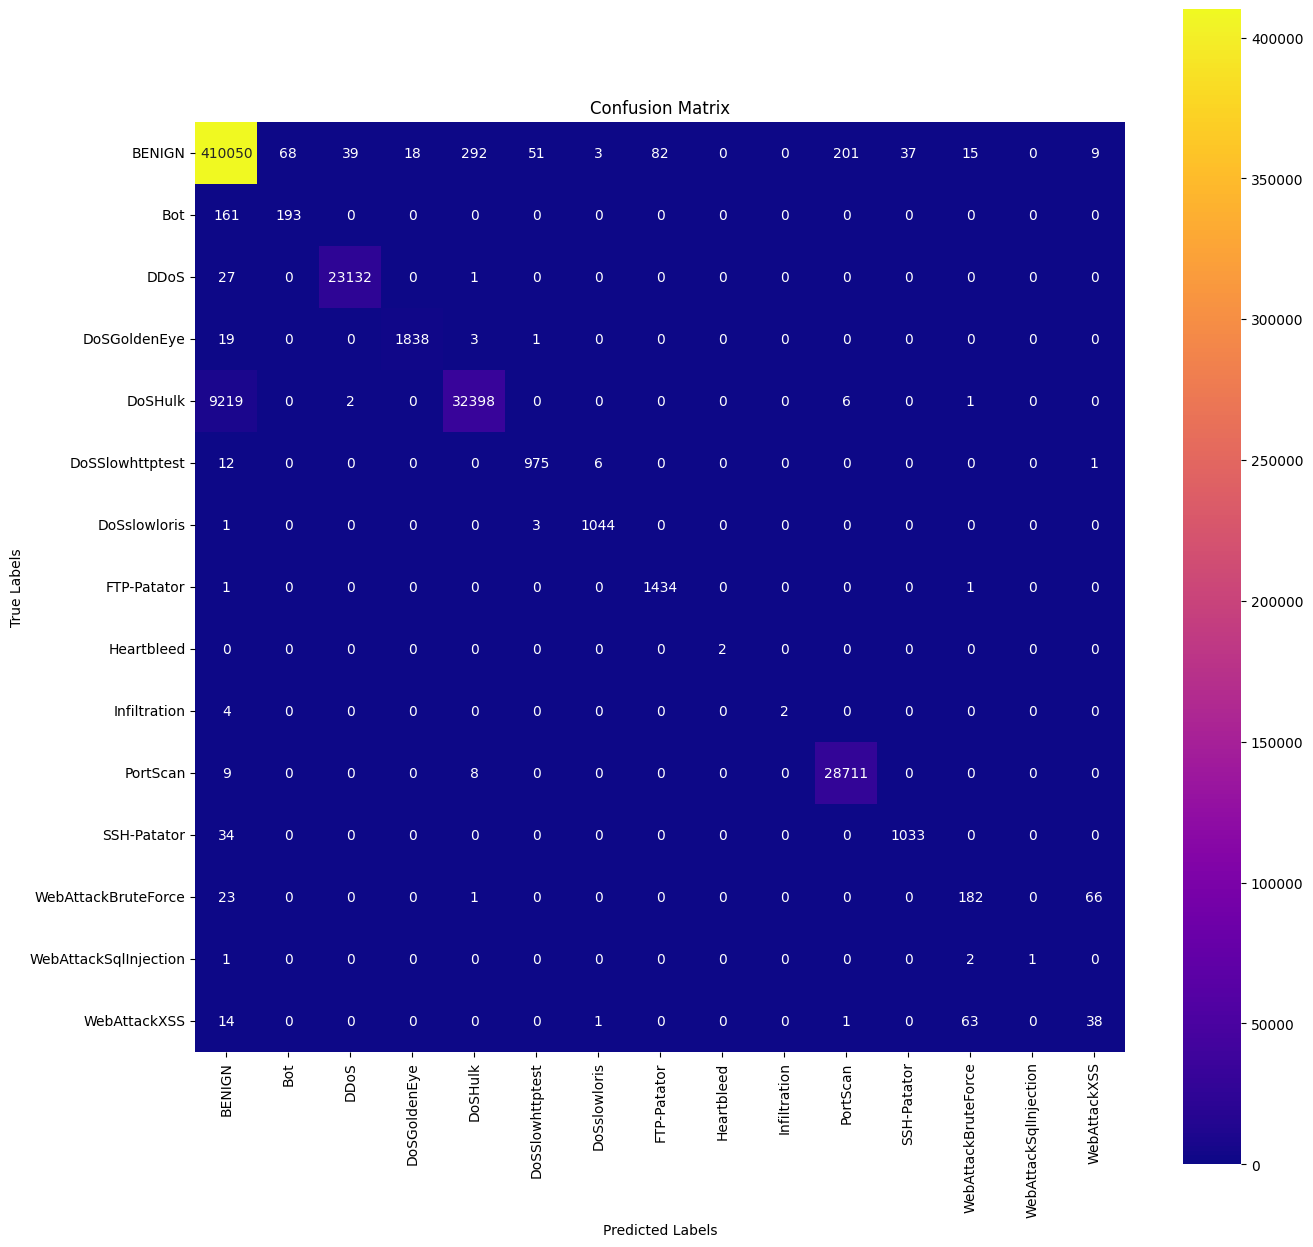

Total Accuracy:  97.94307385541697
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    410865
           1       0.74      0.55      0.63       354
           2       1.00      1.00      1.00     23160
           3       0.99      0.99      0.99      1861
           4       0.99      0.78      0.87     41626
           5       0.95      0.98      0.96       994
           6       0.99      1.00      0.99      1048
           7       0.95      1.00      0.97      1436
           8       1.00      1.00      1.00         2
           9       1.00      0.33      0.50         6
          10       0.99      1.00      1.00     28728
          11       0.97      0.97      0.97      1067
          12       0.69      0.67      0.68       272
          13       1.00      0.25      0.40         4
          14       0.33      0.32      0.33       117

   micro avg       0.98      0.98      0.98    511540
   macro avg       0.90

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
perf_evaluation(y_test,y_pred,labels)

# K-Nearest Neighbours

In [ ]:
perf_evaluation(y_test,y_pred,labels)

# Naive Bayes

In [ ]:
perf_evaluation(y_test,y_pred,labels)

# Random Forest

In [ ]:
perf_evaluation(y_test,y_pred,labels)